In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt


from nltk import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import stopwords

# nltk.download('punkt')
# nltk.download('stopwords')

## Data

In [85]:
data = pd.read_csv("data/ACL_data.csv")
data = data[~pd.isnull(data['ABSTRACT'])] # filtro abstracts nulos 
data = data[data["ABSTRACT"]!= 't']
data = data.drop_duplicates(subset = ['YEAR',  'TITLE', 'ABSTRACT', 'AUTHOR']) 
data.sort_values(by = 'YEAR', inplace = True, ascending =False)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33668 entries, 0 to 33810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YEAR       33668 non-null  int64 
 1   TITLE      33668 non-null  object
 2   ABSTRACT   33668 non-null  object
 3   AUTHOR     33628 non-null  object
 4   PUBLISHER  32809 non-null  object
 5   BOOKTITLE  33014 non-null  object
 6   CATEGORY   33668 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


In [86]:
data.loc[2,:]
data.index.get_loc(2)

2057

In [87]:
data.loc[2, 'ABSTRACT']

"Non-Player Characters (NPCs) significantly enhance the player experience in many games. Historically, players{'} interactions with NPCs have tended to be highly scripted, to be limited to natural language responses to be selected by the player, and to not involve dynamic change in game state. In this work, we demonstrate that use of a few example conversational prompts can power a conversational agent to generate both natural language and novel code. This approach can permit development of NPCs with which players can have grounded conversations that are free-form and less repetitive. We demonstrate our approach using OpenAI Codex (GPT-3 finetuned on GitHub), with Minecraft game development as our test bed. We show that with a few example prompts, a Codex-based agent can generate novel code, hold multi-turn conversations and answer questions about structured data. We evaluate this application using experienced gamers in a Minecraft realm and provide analysis of failure cases and sugges

In [88]:
data.ABSTRACT.isnull().values.any()

False

## Cleaning

In [89]:
STOP_WORDS_en = stopwords.words("english")
STOP_WORDS_fr = stopwords.words("french")
STOP_WORDS = STOP_WORDS_fr + STOP_WORDS_en

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS_en and word.isalpha() and len(word)>1]
    
texts= [tokenize(str(doc).lower()) for doc in data['ABSTRACT']]

texts_df = pd.DataFrame([' '.join(text) for text in texts], columns = ['text'])

data['ABSTRACT'] = texts_df.text


In [90]:
len(texts_df)

33668

In [91]:
print(len(data[data.ABSTRACT.isnull()]))
# data[data.ABSTRACT.isnull()].to_csv('data/abstracts_nulos_postprocesamiento.csv')

124


In [92]:
data.loc[2057, 'ABSTRACT']

'characters npcs significantly enhance player experience many games historically players interactions npcs tended highly scripted limited natural language responses selected player involve dynamic change game state work demonstrate use example conversational prompts power conversational agent generate natural language novel code approach permit development npcs players grounded conversations less repetitive demonstrate approach using openai codex finetuned github minecraft game development test bed show example prompts agent generate novel code hold conversations answer questions structured data evaluate application using experienced gamers minecraft realm provide analysis failure cases suggest possible directions solutions'

## Sampling

In [93]:
anio_corte = 2016
len(data[data['YEAR']==anio_corte])

1816

In [94]:
paper_sample = len(data[data['YEAR']==anio_corte])
semilla = 420

data_original = data.copy() 

data =data[~pd.isnull(data['ABSTRACT'])]

data_sample = data[data['YEAR']<anio_corte].sort_values('YEAR', ascending =True)
data_sample

for i in range(anio_corte, 2023):
    data_i = data[data['YEAR']== i].sample(paper_sample, random_state= semilla) 
    
    data_sample = pd.concat([data_sample, data_i])

# ordeno por año y creo time_slice
data_sample.sort_values(by = 'YEAR', inplace = True, ascending =True)
time_slice = data_sample.groupby(['YEAR'])['YEAR'].count()

data_sample.YEAR.value_counts(normalize = True)
data_sample

,YEAR,TITLE,ABSTRACT,AUTHOR,PUBLISHER,BOOKTITLE,CATEGORY
33645,1991,The Translator{'}s Workbench: An Environment f...,mechanical translation research involves desig...,"Kugler, Marianne and",NaN,Proceedings of Machine Translation Summit III:...,INPROCEEDINGS
33634,1991,Advances in Machine Translation Research in {IBM,sakai described new technique mechanical trans...,"Rimon, Mori and",NaN,Proceedings of Machine Translation Summit III:...,INPROCEEDINGS
33652,1991,Parsing without Parser,approach problem based stratificational gramma...,"Hasida, Ko{\^\i}ti and",Association for Computational Linguistics,Proceedings of the Second International Worksh...,INPROCEEDINGS
33651,1991,Proceedings of the Second International Worksh...,approach study information processing verbal i...,"Tomita, Masaru and",Association for Computational Linguistics,Proceedings of the Second International Worksh...,INPROCEEDINGS
33650,1991,Connectionist and Symbolic Processing in Speec...,comprehensive grammars developed linguistics r...,"Jain, A. N. and",NaN,Proceedings of Machine Translation Summit III:...,INPROCEEDINGS
...,...,...,...,...,...,...,...
596,2022,"Towards Process-Oriented, Modular, and Versati...",paper set quantify syntactic capacity bert eva...,"Wang, Xu and",Association for Computational Linguistics,Proceedings of the 2022 Conference of the Nort...,INPROCEEDINGS
843,2022,FRUIT}: Faithfully Reflecting Updated Informat...,works financial forecasting use information di...,"Iv, Robert and",Association for Computational Linguistics,Proceedings of the 2022 Conference of the Nort...,INPROCEEDINGS
699,2022,V}al{CAT}: Variable-Length Contextualized Adve...,recent vlp architectures clip tremendous amoun...,"Deng, Chuyun and",Association for Computational Linguistics,Proceedings of the 2022 Conference of the Nort...,INPROCEEDINGS
509,2022,Beyond Static models and test sets: Benchmarki...,multidomain multilingual machine translation o...,"Ahuja, Kabir and",Association for Computational Linguistics,Proceedings of NLP Power! The First Workshop o...,INPROCEEDINGS


In [95]:
dataset = data_sample.ABSTRACT.tolist()
dataset[0]

'mechanical translation research involves design computer system simulates language processes associated problem collecting language data used translation large quantities information needed computer may useful data accumulation verification generalized information system able accept many types data linguist encodes suitable means communication linguist system established may achieved central input called linguistic requests central output called information displays requests coordinated possible inputs system compatible displays composed system clearly understandable information system interpretive linguist needs allowing program data manipulation key scheme linguist permitted classify data freely retrieve chooses disposal selecting sorting displaying functions verify data select data introduction mechanical translation system perform activities necessary research information system designed linguistics research center university texas'

## Export

In [96]:
data.to_csv('data/ACL_data_without_nulls.csv', index = False)

data_sample.to_csv('data/data_sample.csv', index = False)
time_slice.to_csv('data/time_slice.csv', index = False)

data_abstracts = pd.DataFrame(data_sample['ABSTRACT'])
data_abstracts.columns = ['text']
data_abstracts.to_csv('data/data_clean.csv', index = False)


## Word count

In [97]:
new_df = texts_df.text.str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df.to_csv('data/word_count.csv', index = False)

new_df

,Word,Frequency
0,model,24566
1,language,24078
2,models,21509
3,data,19228
4,task,17089
...,...,...
48153,okwugbe,1
48154,fallible,1
48155,wikismall,1
48156,representataions,1


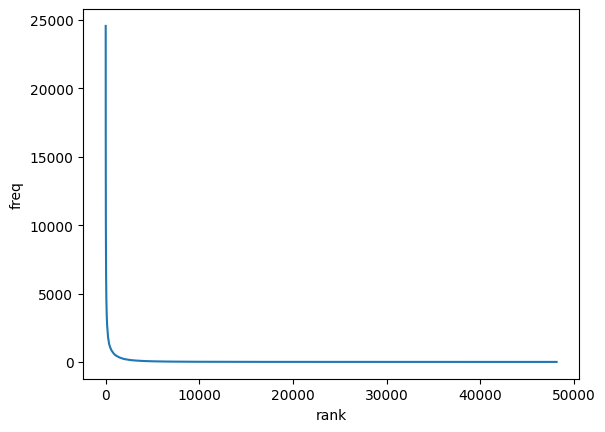

In [98]:
# plot de frecuencia vs ranking (la palabra mas frecuente tiene rank=1, la segunda tiene rank=2, etc..)
plt.plot(range(len(new_df)),new_df.Frequency)
plt.xlabel('rank');plt.ylabel('freq');

In [99]:

  # palabras con 1 sola occurrencia
print("el ",
      round(100*sum(new_df.Frequency==1)/len(new_df.Frequency),2),
      "% de las palabras aparecen 1 sola vez")

print("las 10 palabras mas frecuentes representan el ",
      round(100*new_df.Frequency[:10].sum()/new_df.Frequency.sum(),2),
      "% del corpus")



el  37.81 % de las palabras aparecen 1 sola vez
las 10 palabras mas frecuentes representan el  6.45 % del corpus
